In [32]:
import numpy as np 
import pandas as pd 

**Viewing the English Premier League matches data**

In [33]:
data=pd.read_csv('/kaggle/input/premier-league-matches-19922022/eplmatches.csv')
data.head(5)                    

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [34]:
data.describe()

,Season_End_Year,Wk,HomeGoals,AwayGoals
count,11646.000000,11646.000000,11646.000000,11646.000000
mean,2007.214838,19.738022,1.520780,1.140048
std,8.781986,11.128955,1.302456,1.132243
min,1993.000000,1.000000,0.000000,0.000000
25%,2000.000000,10.000000,1.000000,0.000000
50%,2007.000000,20.000000,1.000000,1.000000
75%,2015.000000,29.000000,2.000000,2.000000
max,2022.000000,42.000000,9.000000,9.000000


In [35]:
data['winner'] = data.apply(lambda row: row['Home'] if row['FTR'] == 'H' else row['Away'] if row['FTR'] == 'A' else 'Draw', axis=1)
data.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,winner
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,Coventry City
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,Leeds United
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,Sheffield Utd
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,Draw
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,Norwich City


In [36]:
import matplotlib.pyplot as plt

**Adding the winner column**

In [37]:

results = data.groupby(['FTR','Season_End_Year']).count()
results

Wk  Date  Home  HomeGoals  AwayGoals  Away  winner
FTR Season_End_Year                                                     
A   1993             118   118   118        118        118   118     118
    1994             128   128   128        128        128   128     128
    1995             123   123   123        123        123   123     123
    1996              96    96    96         96         96    96      96
    1997              99    99    99         99         99    99      99
...                  ...   ...   ...        ...        ...   ...     ...
H   2018             173   173   173        173        173   173     173
    2019             181   181   181        181        181   181     181
    2020             172   172   172        172        172   172     172
    2021             144   144   144        144        144   144     144
    2022             163   163   163        163        163   163     163

[90 rows x 7 columns]

In [38]:
results=results[['winner']]
results.head()

winner
FTR Season_End_Year        
A   1993                118
    1994                128
    1995                123
    1996                 96
    1997                 99

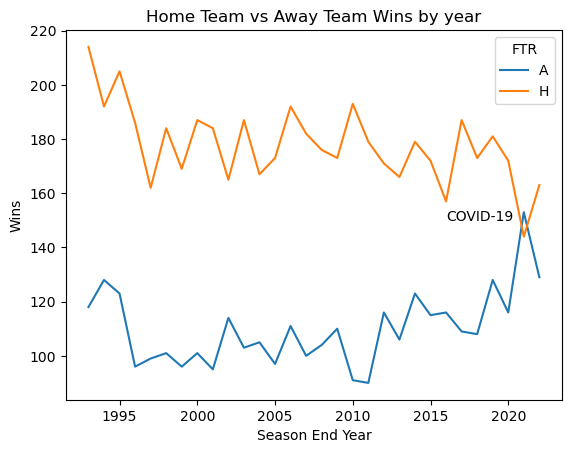

In [39]:
# Reset the index of the DataFrame
results = results.reset_index()

# Filter the DataFrame to select decisive results (no draws)
results_subset = results.query("FTR in ['A', 'H']")[['Season_End_Year', 'winner', 'FTR']]

# Pivot the DataFrame to have categories as columns
results_pivot = results_subset.pivot(columns='FTR', values='winner', index='Season_End_Year')

# Plotting the results as a line chart
results_pivot.plot(kind='line')
plt.title('Home Team vs Away Team Wins by year')
plt.xlabel('Season End Year')
plt.ylabel('Wins')
# Highlighting the COVID IMPACT
plt.text(2016,150,'COVID-19')
plt.show()

**Home teams have a clear advantage in the premier league. A Notable outlier is the 19/20 season where Covid-19 mandated games played with no crowds**

In [92]:
goals_scored = data.groupby(['Season_End_Year']).sum()
goals_scored =goals_scored[['HomeGoals','AwayGoals']]
#goals_scored

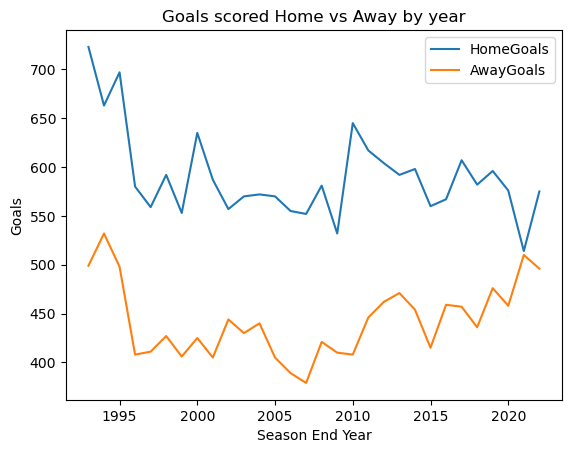

In [41]:
goals_scored.plot(kind='line')

# Add chart titles and labels
plt.title('Goals scored Home vs Away by year')
plt.xlabel('Season End Year')
plt.ylabel('Goals')
plt.show()

In [42]:
data['loser'] = data.apply(lambda row: row['Home'] if row['FTR'] == 'A' else row['Away'] if row['FTR'] == 'H' else 'Draw', axis=1)
data.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,winner,loser
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,Coventry City,Middlesbrough
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,Leeds United,Wimbledon
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,Sheffield Utd,Manchester Utd
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,Draw,Draw
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,Norwich City,Arsenal


In [43]:
data.head(15)

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,winner,loser
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,Coventry City,Middlesbrough
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,Leeds United,Wimbledon
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,Sheffield Utd,Manchester Utd
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,Draw,Draw
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,Norwich City,Arsenal
5,1993,1,1992-08-15,Ipswich Town,1,1,Aston Villa,D,Draw,Draw
6,1993,1,1992-08-15,Everton,1,1,Sheffield Weds,D,Draw,Draw
7,1993,1,1992-08-15,Southampton,0,0,Tottenham,D,Draw,Draw
8,1993,1,1992-08-15,Chelsea,1,1,Oldham Athletic,D,Draw,Draw
9,1993,1,1992-08-16,Nott'ham Forest,1,0,Liverpool,H,Nott'ham Forest,Liverpool


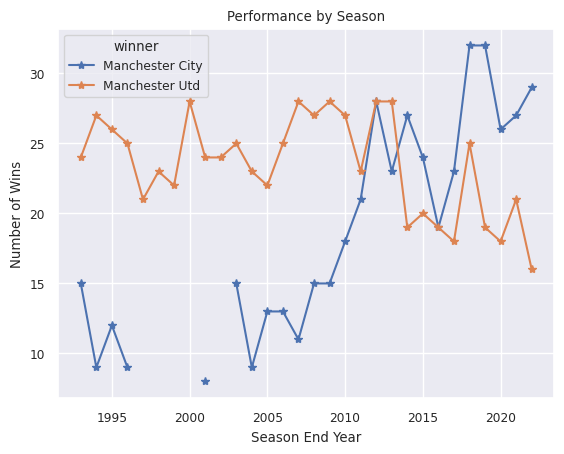

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Looking specifically at the Manchester Derby Rivals
teams = ['Manchester Utd', 'Manchester City']

# Filtering the matches to only include those where the winner is one of the teams
team_matches = data[data['winner'].isin(teams)]

# Group the matches by season end year and the winning team, and count the number of wins for each team in each year
win_counts = team_matches.groupby(['Season_End_Year', 'winner'])['winner'].count()

# Pivot the table so that each team has its own column
win_table = win_counts.unstack('winner')

# Plot the resulting DataFrame
win_table.plot(kind='line', marker='*')

# Set the axis labels and title
plt.xlabel('Season End Year')
plt.ylabel('Number of Wins')
plt.title('Performance by Season')

# Show the plot
plt.show()

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new column 'Winning Team' to store the name of the winning team for each match
data['Winning Team'] = data.apply(lambda row: row['Home'] if row['FTR'] == 'H' else row['Away'] if row['FTR'] =='A' else 'Draw', axis=1)

# Calculate the number of points for each team for each match
data['Home Points'] = data.apply(lambda row: 3 if row['FTR'] == 'H' else 1 if row['FTR'] == 'D' else 0, axis=1)
data['Away Points'] = data.apply(lambda row: 3 if row['FTR'] == 'A' else 1 if row['FTR'] == 'D' else 0, axis=1)
data.head(10)

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,winner,loser,Winning Team,Home Points,Away Points
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,Coventry City,Middlesbrough,Coventry City,3,0
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,Leeds United,Wimbledon,Leeds United,3,0
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,Sheffield Utd,Manchester Utd,Sheffield Utd,3,0
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,Draw,Draw,Draw,1,1
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,Norwich City,Arsenal,Norwich City,0,3
5,1993,1,1992-08-15,Ipswich Town,1,1,Aston Villa,D,Draw,Draw,Draw,1,1
6,1993,1,1992-08-15,Everton,1,1,Sheffield Weds,D,Draw,Draw,Draw,1,1
7,1993,1,1992-08-15,Southampton,0,0,Tottenham,D,Draw,Draw,Draw,1,1
8,1993,1,1992-08-15,Chelsea,1,1,Oldham Athletic,D,Draw,Draw,Draw,1,1
9,1993,1,1992-08-16,Nott'ham Forest,1,0,Liverpool,H,Nott'ham Forest,Liverpool,Nott'ham Forest,3,0


**Computing points required to win for each year**

In [46]:

# Calculate the number of wins, losses, and draws for each team by season
wins = data.groupby(['Season_End_Year', 'winner'])['winner'].count().reset_index(name='Wins')
losses = data.groupby(['Season_End_Year', 'loser'])['loser'].count().reset_index(name='Losses')
#draws = data[data['FTR'] == 'D'].groupby(['Season_End_Year'])[['FTR']].count().reset_index().rename(columns={'FTR': 'Draws'})
#teams = pd.concat([wins, losses], axis=0, ignore_index=True).groupby(['Season_End_Year', 'winner']).sum().reset_index()

losses.tail(20)

,Season_End_Year,loser,Losses
615,2022,Aston Villa,19
616,2022,Brentford,18
617,2022,Brighton,11
618,2022,Burnley,17
619,2022,Chelsea,6
620,2022,Crystal Palace,12
621,2022,Draw,88
622,2022,Everton,21
623,2022,Leeds United,18
624,2022,Leicester City,14


In [47]:
wins = wins.rename(columns={'winner': 'Team'})
losses = losses.rename(columns={'loser': 'Team'})

losses.tail(20)

,Season_End_Year,Team,Losses
615,2022,Aston Villa,19
616,2022,Brentford,18
617,2022,Brighton,11
618,2022,Burnley,17
619,2022,Chelsea,6
620,2022,Crystal Palace,12
621,2022,Draw,88
622,2022,Everton,21
623,2022,Leeds United,18
624,2022,Leicester City,14


In [65]:
#team_season_stats = pd.concat([wins, losses['Losses']], axis=1)
team_season_stats = pd.merge(wins, losses, on=['Season_End_Year', 'Team'], how='outer')

#team_season_stats['Draws']=38-team_season_stats['Wins']-team_season_stats['Losses']
#team_season_stats['Points']=3*team_season_stats['Wins']+team_season_stats['Draws']
team_season_stats.tail(20)

,Season_End_Year,Team,Wins,Losses
616,2022,Aston Villa,13,19.0
617,2022,Brentford,13,18.0
618,2022,Brighton,12,11.0
619,2022,Burnley,7,17.0
620,2022,Chelsea,21,6.0
621,2022,Crystal Palace,11,12.0
622,2022,Draw,88,88.0
623,2022,Everton,11,21.0
624,2022,Leeds United,9,18.0
625,2022,Leicester City,14,14.0


In [83]:
team_season_stats['Draws']=38-team_season_stats['Wins']-team_season_stats['Losses']
team_season_stats['Points']=3*team_season_stats['Wins']+team_season_stats['Draws']
team_season_stats = team_season_stats[team_season_stats['Team'] != 'Draw']
#team_season_stats.tail(20)


,Season_End_Year,Team,Wins,Losses,Draws,Points
615,2022,Arsenal,22,13.0,3.0,69.0
616,2022,Aston Villa,13,19.0,6.0,45.0
617,2022,Brentford,13,18.0,7.0,46.0
618,2022,Brighton,12,11.0,15.0,51.0
619,2022,Burnley,7,17.0,14.0,35.0
620,2022,Chelsea,21,6.0,11.0,74.0
621,2022,Crystal Palace,11,12.0,15.0,48.0
623,2022,Everton,11,21.0,6.0,39.0
624,2022,Leeds United,9,18.0,11.0,38.0
625,2022,Leicester City,14,14.0,10.0,52.0


In [57]:
max_points_by_year = team_season_stats.loc[team_season_stats.groupby('Season_End_Year')['Points'].idxmax()].reset_index(drop=True)
#max_points_by_year

**We see a general increase in the points required to win the league. This is a testament to the increased competetiveness of the league especially during the 'Guardiola-Klopp' era of 2018-2022**

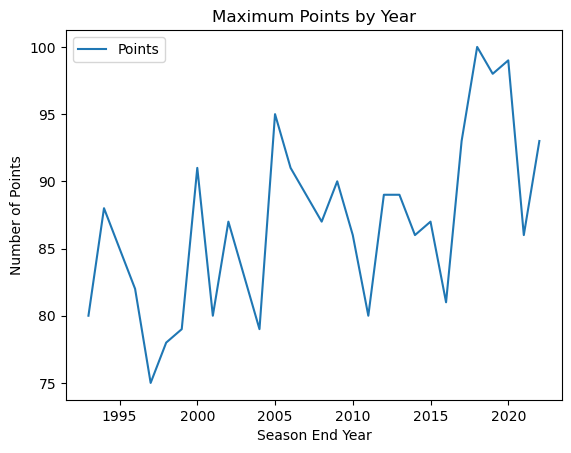

In [58]:
max_points_by_year.plot.line(x='Season_End_Year', y='Points', rot=0)
plt.xlabel('Season End Year')
plt.ylabel('Number of Points')
plt.title('Maximum Points by Year')

plt.show()

**The box plot of points scored by teams since the 2009-10 season shows a steady increase in the upper whisker, including 2 anomalies observed for Liverpool in 2019-20 (99 pts) and Manchester City in 2021-22 (93 pts)**

<AxesSubplot:xlabel='Season_End_Year', ylabel='Points'>

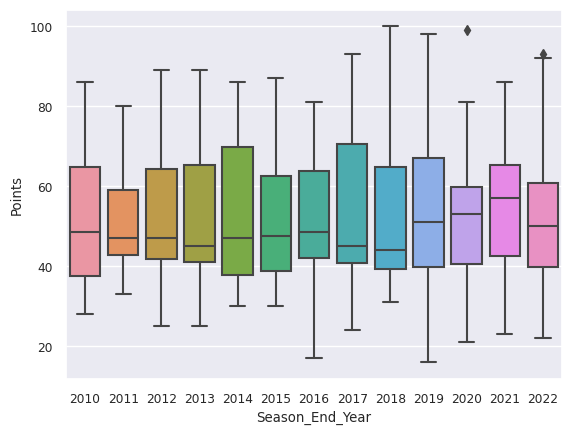

In [90]:
team_season_stats_recent=team_season_stats[team_season_stats['Season_End_Year']>=2010]
sns.boxplot(data=team_season_stats_recent,x='Season_End_Year',y='Points')

**Looking at the Total Wins accumulated by team**

In [72]:
team_wins = team_season_stats[['Team','Wins']].groupby('Team').sum()
#team_wins=team_wins.rename(columns={'Home':'Wins'})
team_wins.drop(labels='Draw',axis=0,inplace=True)
team_wins = team_wins.sort_values(by='Wins', ascending=False)

team_wins.head(6)

,Wins
Team,
Manchester Utd,703
Arsenal,619
Chelsea,618
Liverpool,609
Tottenham,502
Manchester City,473


**The 'Big 6' lead the total wins count over 30 years in the premier league**

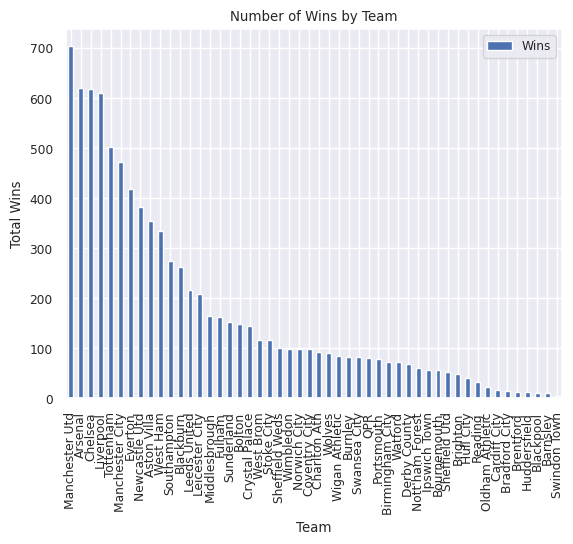

In [70]:

team_wins.plot.bar()
plt.gca().set(title='Number of Wins by Team', xlabel='Team', ylabel='Total Wins')
plt.show()

**Analyzing team performance and favourite opponents**

In [54]:
win_loss_grid = data.groupby(['winner','loser'],as_index=False).count()
win_loss_grid = win_loss_grid[['winner','loser','Winning Team']]
win_loss_grid.rename(columns={"Winning Team":"wins"},inplace=True)
win_loss_grid=win_loss_grid.pivot(index='winner',columns='loser')
win_loss_grid=win_loss_grid.fillna(0)
win_loss_grid.head(10)

wins                                                 \
loser           Arsenal Aston Villa Barnsley Birmingham City Blackburn   
winner                                                                   
Arsenal             0.0        29.0      2.0             9.0      19.0   
Aston Villa        11.0         0.0      1.0             6.0      15.0   
Barnsley            0.0         1.0      0.0             0.0       0.0   
Birmingham City     1.0         4.0      0.0             0.0       5.0   
Blackburn           9.0        15.0      1.0             5.0       0.0   
Blackpool           0.0         0.0      0.0             0.0       0.0   
Bolton              5.0         6.0      0.0             6.0       8.0   
Bournemouth         1.0         3.0      0.0             0.0       0.0   
Bradford City       1.0         0.0      0.0             0.0       0.0   
Brentford           1.0         1.0      0.0             0.0       0.0   

                                                                      ...  \
loser           Blackpool Bolton Bournemouth Bradford City Brentford  ...   
winner                                                                ...   
Arsenal               2.0   15.0         7.0           2.0       1.0  ...   
Aston Villa           1.0   11.0         1.0           3.0       0.0  ...   
Barnsley              0.0    1.0         0.0           0.0       0.0  ...   
Birmingham City       2.0    6.0         0.0           0.0       0.0  ...   
Blackburn             1.0    9.0         0.0           0.0       0.0  ...   
Blackpool             0.0    1.0         0.0           0.0       0.0  ...   
Bolton                0.0    0.0         0.0           0.0       0.0  ...   
Bournemouth           0.0    0.0         0.0           0.0       0.0  ...   
Bradford City         0.0    0.0         0.0           0.0       0.0  ...   
Brentford             0.0    0.0         0.0           0.0       0.0  ...   

                                                                        \
loser           Sunderland Swansea City Swindon Town Tottenham Watford   
winner                                                                   
Arsenal               19.0          7.0          1.0      22.0    13.0   
Aston Villa           11.0          1.0          2.0      15.0     4.0   
Barnsley               0.0          0.0          0.0       0.0     0.0   
Birmingham City        6.0          0.0          0.0       3.0     0.0   
Blackburn              6.0          1.0          2.0      11.0     1.0   
Blackpool              1.0          0.0          0.0       1.0     0.0   
Bolton                 4.0          0.0          0.0       9.0     2.0   
Bournemouth            2.0          4.0          0.0       1.0     1.0   
Bradford City          1.0          0.0          0.0       0.0     1.0   
Brentford              0.0          0.0          0.0       0.0     2.0   

                                                                    
loser           West Brom West Ham Wigan Athletic Wimbledon Wolves  
winner                                                              
Arsenal              18.0     34.0           12.0       7.0   10.0  
Aston Villa           8.0     13.0            5.0       7.0    5.0  
Barnsley              0.0      0.0            0.0       1.0    0.0  
Birmingham City       3.0      3.0            4.0       0.0    2.0  
Blackburn             4.0      8.0            7.0       7.0    5.0  
Blackpool             1.0      0.0            1.0       0.0    1.0  
Bolton                2.0     12.0            4.0       2.0    5.0  
Bournemouth           3.0      4.0            0.0       0.0    0.0  
Bradford City         0.0      0.0            0.0       1.0    0.0  
Brentford             0.0      2.0            0.0       0.0    1.0  

[10 rows x 51 columns]

**Analyzing the Big 6 head to head**

In [59]:
teams = ['Manchester Utd','Arsenal','Tottenham','Chelsea','Liverpool','Manchester City']
win_loss_grid.columns = win_loss_grid.columns.droplevel(0)

filtered_grid = win_loss_grid.loc[teams, teams]


filtered_grid

loser,Manchester Utd,Arsenal,Tottenham,Chelsea,Liverpool,Manchester City
winner,,,,,,
Manchester Utd,0.0,25.0,38.0,17.0,28.0,24.0
Arsenal,17.0,0.0,22.0,23.0,16.0,23.0
Tottenham,10.0,15.0,0.0,7.0,14.0,27.0
Chelsea,18.0,20.0,33.0,0.0,21.0,27.0
Liverpool,18.0,25.0,29.0,23.0,0.0,20.0
Manchester City,17.0,17.0,16.0,16.0,11.0,0.0


**Heatmap of the win loss grid** 

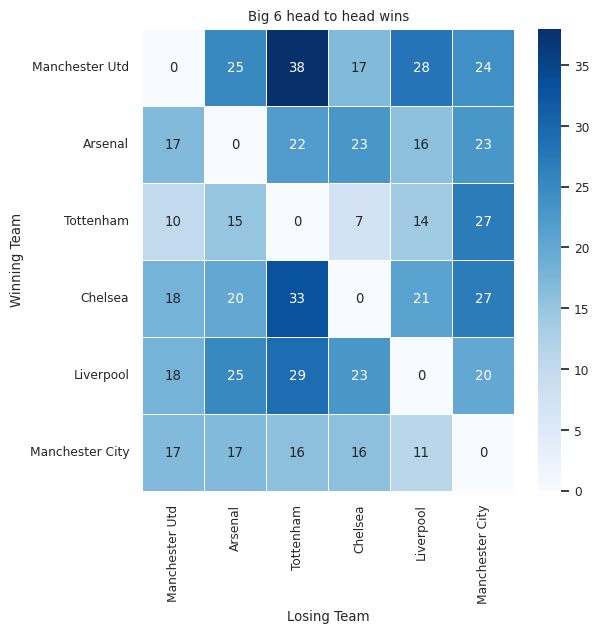

In [60]:
import seaborn as sns
sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(filtered_grid, annot=True, cmap='Blues', fmt='g', linewidths=0.5, ax=ax)

# Set the title and labels
ax.set_title('Big 6 head to head wins')
ax.set_xlabel('Losing Team')
ax.set_ylabel('Winning Team')

plt.show()

In [61]:
win_differential=filtered_grid-filtered_grid.transpose()
win_differential

loser,Manchester Utd,Arsenal,Tottenham,Chelsea,Liverpool,Manchester City
winner,,,,,,
Manchester Utd,0.0,8.0,28.0,-1.0,10.0,7.0
Arsenal,-8.0,0.0,7.0,3.0,-9.0,6.0
Tottenham,-28.0,-7.0,0.0,-26.0,-15.0,11.0
Chelsea,1.0,-3.0,26.0,0.0,-2.0,11.0
Liverpool,-10.0,9.0,15.0,2.0,0.0,9.0
Manchester City,-7.0,-6.0,-11.0,-11.0,-9.0,0.0


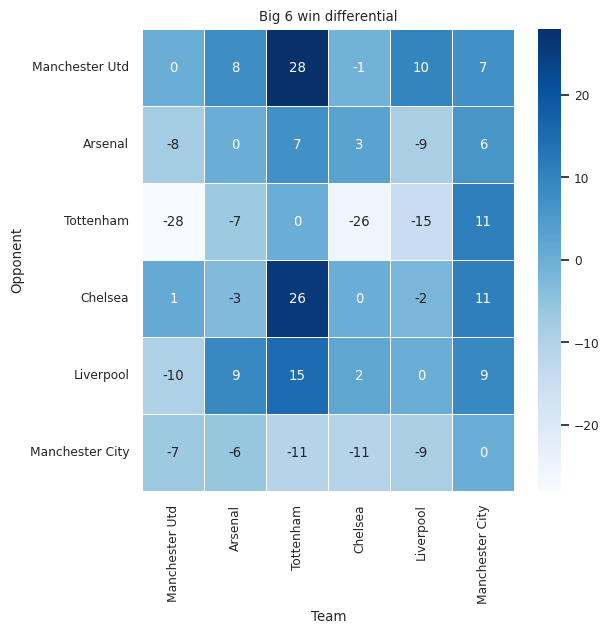

In [62]:
sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(win_differential, annot=True, cmap='Blues', fmt='g', linewidths=0.5, ax=ax)

# Set the title and labels
ax.set_title('Big 6 win differential')
ax.set_xlabel('Team')
ax.set_ylabel('Opponent')

plt.show()

In [74]:
recent_data=data[data['Season_End_Year']>=2010]
recent_data.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,winner,loser,Winning Team,Home Points,Away Points
6706,2010,1,2009-08-15,Portsmouth,0,1,Fulham,A,Fulham,Portsmouth,Fulham,0,3
6707,2010,1,2009-08-15,Wolves,0,2,West Ham,A,West Ham,Wolves,West Ham,0,3
6708,2010,1,2009-08-15,Aston Villa,0,2,Wigan Athletic,A,Wigan Athletic,Aston Villa,Wigan Athletic,0,3
6709,2010,1,2009-08-15,Bolton,0,1,Sunderland,A,Sunderland,Bolton,Sunderland,0,3
6710,2010,1,2009-08-15,Stoke City,2,0,Burnley,H,Stoke City,Burnley,Stoke City,3,0


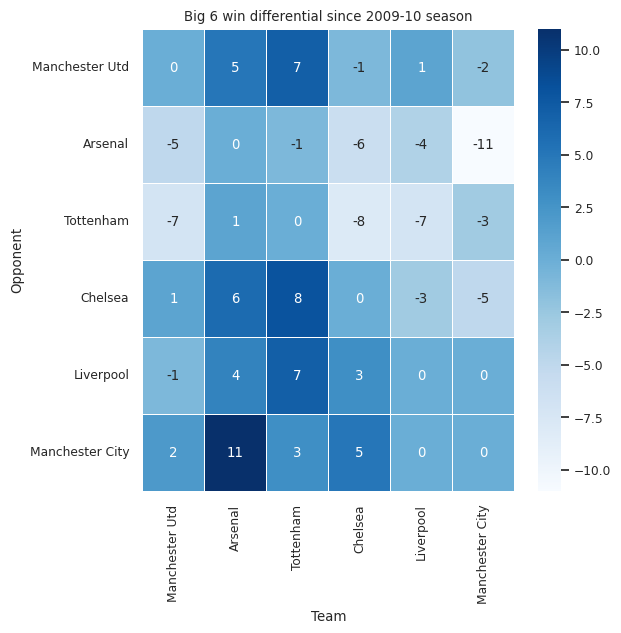

In [79]:
win_loss_grid = recent_data.groupby(['winner','loser'],as_index=False).count()
win_loss_grid = win_loss_grid[['winner','loser','Winning Team']]
win_loss_grid.rename(columns={"Winning Team":"wins"},inplace=True)
win_loss_grid=win_loss_grid.pivot(index='winner',columns='loser')
win_loss_grid=win_loss_grid.fillna(0)
#win_loss_grid.head(10)
teams = ['Manchester Utd','Arsenal','Tottenham','Chelsea','Liverpool','Manchester City']
win_loss_grid.columns = win_loss_grid.columns.droplevel(0)

filtered_grid = win_loss_grid.loc[teams, teams]
win_differential=filtered_grid-filtered_grid.transpose()

sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(win_differential, annot=True, cmap='Blues', fmt='g', linewidths=0.5, ax=ax)

# Set the title and labels
ax.set_title('Big 6 win differential since 2009-10 season')
ax.set_xlabel('Team')
ax.set_ylabel('Opponent')

plt.show()